<a href="https://colab.research.google.com/github/BriannaBalamV/DataMining/blob/main/sentimentAnalysis_TrenMaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment analysis of public opinion on the Tren Maya proyect

### CRISP-DM Methodology

####Data Mining, Universidad Politécnica de Yucatán

Student: Brianna Ayelen Balam Velasco

Professor: Victor Alejandro Ortíz Santiago

# 1. Business Understanding

## Objectives:

*   Quantify the overall public sentiment towards the Tren Maya project.
*   Offer a data-driven perspective to stakeholders for informed decision-making.

## Business context:

The Tren Maya project has generated diverse opinions among the public. This project applies sentiment analysis through NLP and ML techniques to measure public perception based on digital discourse.

## Project plan:

1.   Data acquisition
2.   Preprocessing
3.   Sentiment Analysis
4.   Validation
5.   Visualization






# 2. Data Understanding

## Data collection:

At the beginning it was planned to collect the data using the Twitter API (now X), but due to lack of permissions it was not possible, so with the help of GPT-4 a dataset with simulated data was created.


## Exploratory data analysis:

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/new_wide_varied_tweets_dataset.csv')

# View the first few rows
df.head()

,Tweet,Location,Coordinates,Timestamp,Username
0,I'm excited for the environmental sustainabili...,Bacalar,"(18.6783, -88.3926)",21/02/2023 11:52,htaylor
1,I'm optimistic about the cultural significance...,Cancun,"(21.1619, -86.8515)",29/05/2023 08:05,fosterbonnie
2,I have concerns regarding the design and route...,Playa del Carmen,"(20.6296, -87.0739)",11/04/2023 14:14,emills
3,I'm supportive of the construction process of ...,Campeche,"(19.8454, -90.5237)",15/08/2023 19:31,murphyclayton
4,I wonder about the construction process of the...,Chichen Itza,"(20.6843, -88.5678)",08/06/2023 18:51,zwest


In [14]:
# Descriptive statistics
df.describe()

,Tweet,Location,Coordinates,Timestamp,Username
count,1500,1500,1500,1500,1500
unique,825,8,8,1497,1485
top,I wonder about the long-term benefits of the T...,Campeche,"(19.8454, -90.5237)",18/09/2023 10:31,htaylor
freq,6,212,212,2,2


In [15]:
# Missing values
df.isnull().sum()

Tweet          0
Location       0
Coordinates    0
Timestamp      0
Username       0
dtype: int64

In [16]:
# Duplicates
print(df.duplicated().sum())

0


# 3. Data Preparation

## Data cleaning & Data transformation:

Data cleaning is crucial in preparing text data, especially from social media, for analysis. The clean_tweet function in this code performs the following steps:

1.   Removing URLs: The regex pattern r"http\S+|www\S+|https\S+" is used to find and remove URLs from the tweet text. URLs are typically not useful for sentiment analysis and can be considered as noise in the text.
2.   Removing Mentions and Hashtags: The pattern r'\@\w+|\#' is used to remove Twitter mentions (e.g., @username) and hashtags (e.g., #topic). While hashtags can sometimes be relevant for certain analyses, they are often removed to maintain consistency in the text and to focus on the sentiment conveyed by the words alone.

3.    Removing Punctuations: The pattern r'[^\w\s]' is used to remove any character that is not a word character (letters and numbers) or a whitespace. Punctuation marks can introduce noise and are typically removed in sentiment analysis tasks.

In [17]:
import nltk
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import plotly.express as px
from wordcloud import WordCloud

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to clean tweet text
def clean_tweet(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuations
    return text

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# 4. Modeling

## Model selection:

VADER is used for this project taking into account the following aspects:


1.   VADER was designed primarily for sentiment analysis on social media texts. It is good at managing informal language, slang, emoticons, and other peculiarities of social media communication, making it ideal for evaluating tweets.
2.   VADER not only categorizes text as positive, negative, or neutral, but it also quantifies the degree of emotion or sentiment in a particular text.
3.   VADER comes as a pre-trained model which is advantageous for projects where you may not have labeled data for training custom models.

## Model application:

After cleaning, the VADER model is applied to each tweet through the calculate_vader_sentiment function. This function uses VADER's SentimentIntensityAnalyzer to obtain a compound sentiment score for each tweet.

It is to notice that the compound score is a normalized score that ranges from -1 (extremely negative) to +1 (extremely positive), representing the overall sentiment of the tweet.


In [18]:
# Function to calculate VADER sentiment
def calculate_vader_sentiment(text):
    return sia.polarity_scores(text)['compound']
# Load the dataset
file_path = '/content/new_wide_varied_tweets_dataset.csv'
tweets_df = pd.read_csv(file_path)

# Preprocess the tweets
tweets_df['Cleaned_Tweet'] = tweets_df['Tweet'].apply(clean_tweet)

# Apply sentiment analysis
tweets_df['VADER_Polarity'] = tweets_df['Cleaned_Tweet'].apply(calculate_vader_sentiment)

# Categorize the sentiment based on polarity
tweets_df['Sentiment'] = tweets_df['VADER_Polarity'].apply(
    lambda x: 'Positive' if x > 0.1 else ('Negative' if x < -0.1 else 'Neutral'))

# Count the number of each sentiment and calculate percentages
sentiment_counts = tweets_df['Sentiment'].value_counts()
total_tweets = len(tweets_df)
sentiment_percentages = sentiment_counts / total_tweets * 100

# Print sentiment percentages
print("Sentiment Percentages:")
print(sentiment_percentages)

Sentiment Percentages:
Positive    60.600000
Negative    20.333333
Neutral     19.066667
Name: Sentiment, dtype: float64


In [19]:
# Take a random sample of tweets
sample_tweets = tweets_df.sample(n=50, random_state=42)

# Print the cleaned tweet and its corresponding VADER sentiment
for index, row in sample_tweets.iterrows():
    print(f"Tweet: {row['Cleaned_Tweet']}")
    print(f"Assigned Sentiment: {row['Sentiment']}")
    print("--" * 10)

Tweet: I have concerns regarding the environmental sustainability of the Tren Maya and its possible global significance
Assigned Sentiment: Positive
--------------------
Tweet: Im supportive of the design and route of the Tren Maya and the opportunities it presents
Assigned Sentiment: Positive
--------------------
Tweet: I have concerns regarding the longterm benefits of the Tren Maya and its role in Mexicos development
Assigned Sentiment: Positive
--------------------
Tweet: Im excited for the local community involvement in the Tren Maya and its possible global significance
Assigned Sentiment: Positive
--------------------
Tweet: Im critical of the cultural significance of the Tren Maya and its impact on local wildlife
Assigned Sentiment: Neutral
--------------------
Tweet: I wonder about the funding and investments for the Tren Maya and its impact on local wildlife
Assigned Sentiment: Neutral
--------------------
Tweet: Im curious about how the environmental sustainability of the Tre

# 5. Evaluation

# Model evaluation:

Model evaluation consists of calculating the accuracy and generating a classification report based on a comparison between the predicted sentiment labels (y_pred_labels) and the actual sentiment labels (y_test). The accuracy score and the classification report are standard metrics used in classification tasks to evaluate the performance of a model.



In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the dataframe with the sentiments manually applied
manual_df = pd.read_csv('/content/tweets_with_sentiment.csv')

X_train, X_test, y_train, y_test = train_test_split(
    tweets_df['Cleaned_Tweet'],
    manual_df['Sentiment'],
    test_size=0.2,
    random_state=42
)

# Apply the sentiment analysis on the test set
y_pred = X_test.apply(lambda x: calculate_vader_sentiment(x))
y_pred_labels = y_pred.apply(lambda x: 'Positive' if x > 0.1 else ('Negative' if x < -0.1 else 'Neutral'))

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred_labels)
report = classification_report(y_test, y_pred_labels)

# Print the accuracy and the classification report
print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 1.0
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        57
     Neutral       1.00      1.00      1.00        61
    Positive       1.00      1.00      1.00       182

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300




## Result interpretation:

1. Accuracy Score: The accuracy is reported as 1.0, this means that the VADER sentiment analysis tool made a good prediction of the sentiment of every tweet in the test set when compared to your ground truth data.

2. Classification Report: The classification report provides detailed metrics for each sentiment class (Negative, Neutral, Positive):

* Precision: Indicates the ratio of correctly predicted positive observations to the total predicted positive observations.

*   Recall: Indicates the ratio of correctly predicted positive observations to the all observations in the actual class.
*   F1-Score: It is the harmonic mean of precision and recall.
*   Support: It is the number of actual occurrences of the class in the specified dataset. For instance, there are 57 Negative, 61 Neutral, and 182 Positive instances in the test set.


### Note:
In order to arrive at the results presented, two iterations had to be carried out, between which the first results were 0.30 and later 0.85.

What was done in these cases was to feed the dataset with more information to be able to make a better prediction.

## Sentiment Analysis Visualization

Once the evaluation part of the model was completed, we proceeded with the visualization, which included:

1.   Sentiment distribution
2.   Sentiment polarity distribution
3.   Positive sentiment word cloud
4.   Negative sentiment word cloud



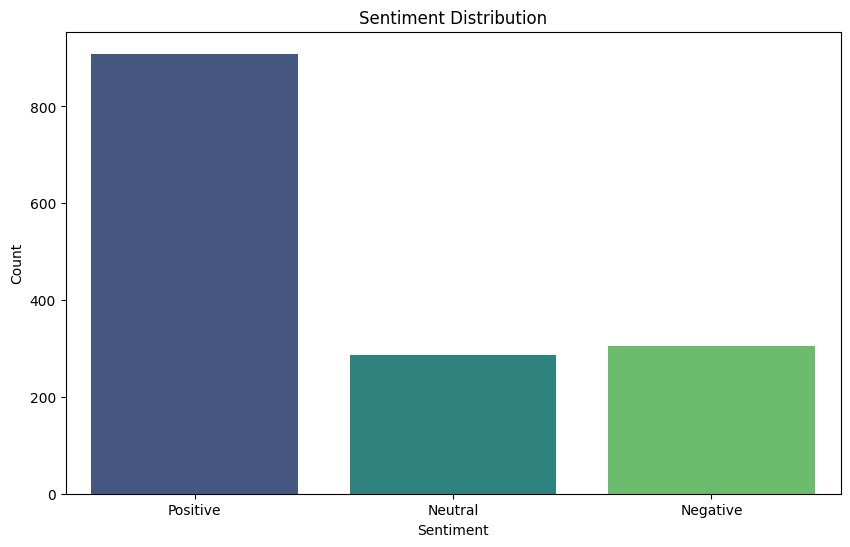

In [21]:
# Visualize the sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=tweets_df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

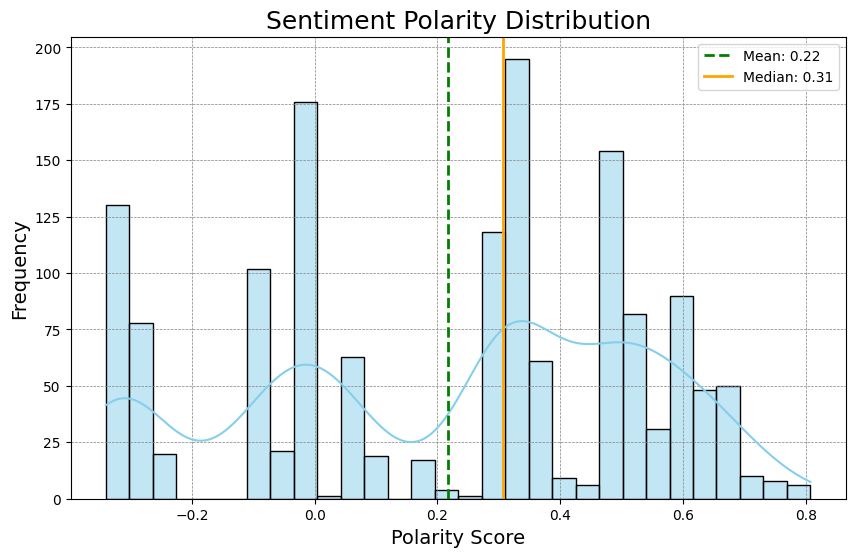

In [22]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Calculate the mean and median
mean_val = tweets_df['VADER_Polarity'].mean()
median_val = tweets_df['VADER_Polarity'].median()

# Plot the distribution with a KDE and increased bins
sns.histplot(tweets_df['VADER_Polarity'], bins=30, kde=True, color='skyblue')

# Add a vertical line for mean and median
plt.axvline(mean_val, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='orange', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

# Add title and labels with larger font sizes for better readability
plt.title('Sentiment Polarity Distribution', fontsize=18)
plt.xlabel('Polarity Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add legend to the plot
plt.legend()

# Add grid to the plot
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

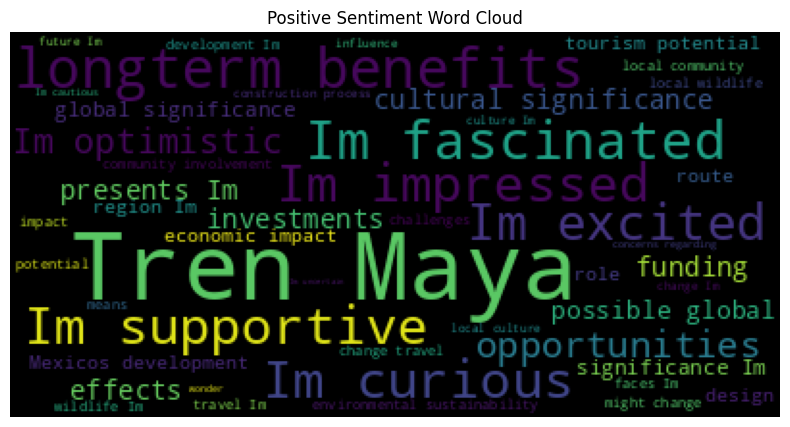

In [23]:
# Word Clouds for Positive and Negative Sentiments
positive_tweets = ' '.join(tweets_df[tweets_df['Sentiment'] == 'Positive']['Cleaned_Tweet'])
negative_tweets = ' '.join(tweets_df[tweets_df['Sentiment'] == 'Negative']['Cleaned_Tweet'])

plt.figure(figsize=(10, 5))
plt.imshow(WordCloud().generate(positive_tweets))
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')
plt.show()

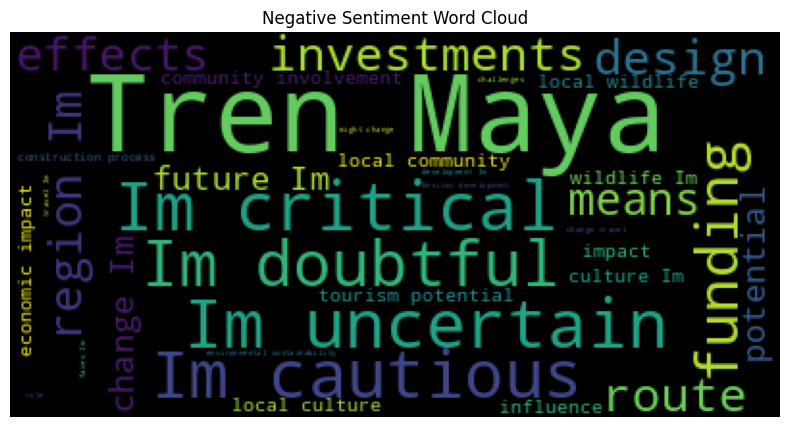

In [24]:
plt.figure(figsize=(10, 5))
plt.imshow(WordCloud().generate(negative_tweets))
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')
plt.show()

## Demographic Analysis


### Sentiment distribution by location

In this section the sentiment distribution by location is presented in a graphic manner.

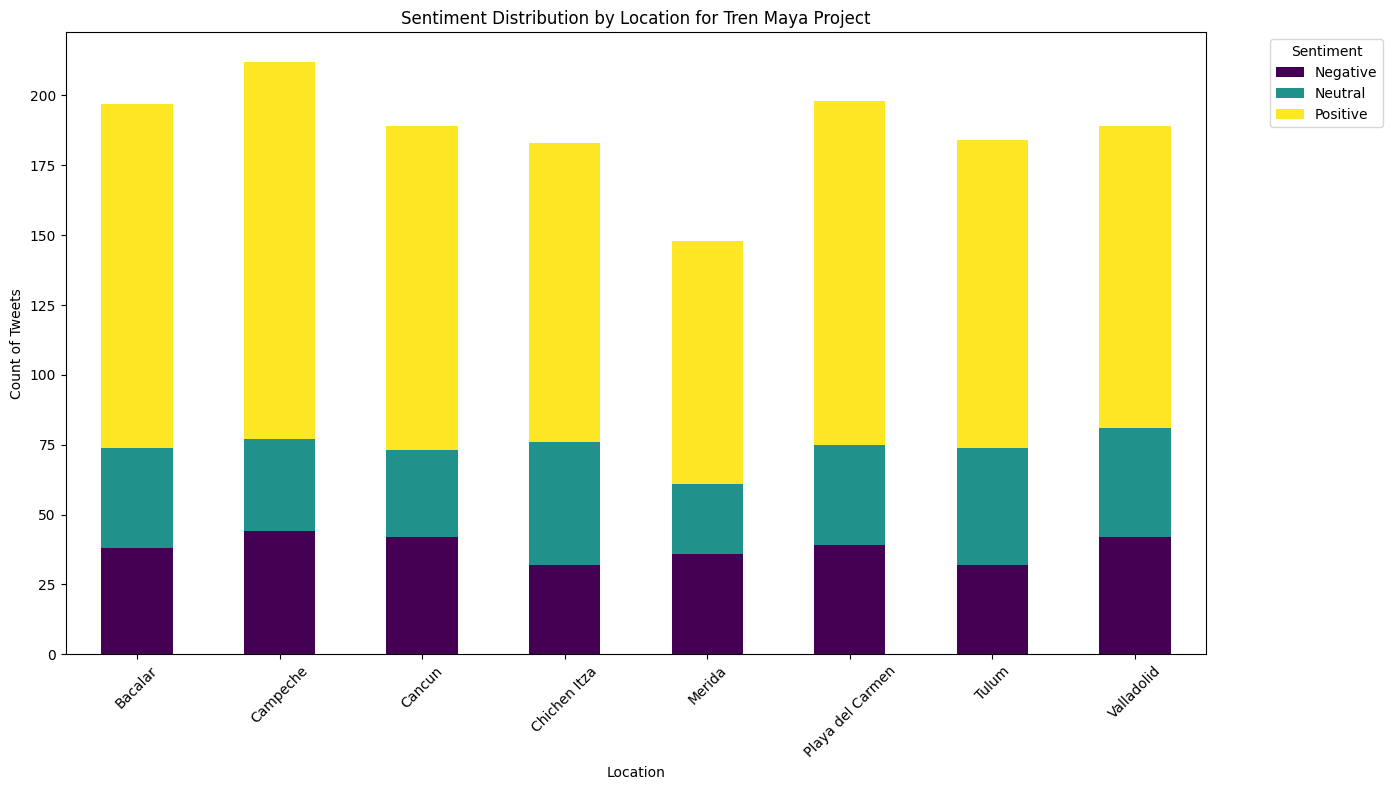

In [25]:
# Group by location and sentiment
sentiment_by_location = tweets_df.groupby(['Location', 'Sentiment']).size().unstack().fillna(0)

# Visualization: Sentiment Distribution by Location
sentiment_by_location.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Sentiment Distribution by Location for Tren Maya Project')
plt.xlabel('Location')
plt.ylabel('Count of Tweets')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Average Sentiment Polarity by Location

This section uses the VADER_Polarity numerical indicator that reflects the overall sentiment expressed from tweets posted in each location.

In [26]:
# Display the columns in the DataFrame to verify the existence of 'Latitude' and 'Longitude'
print(tweets_df.columns)

# Correct the lambda functions to handle the parentheses and convert to float
tweets_df['Latitude'] = tweets_df['Coordinates'].apply(lambda x: float(x.split(',')[0].strip('()')))
tweets_df['Longitude'] = tweets_df['Coordinates'].apply(lambda x: float(x.split(',')[1].strip('()')))

# Agregation
location_sentiment = tweets_df.groupby(['Location', 'Latitude', 'Longitude']).agg({
    'VADER_Polarity': 'mean'
}).reset_index()

print(location_sentiment.head())

Index(['Tweet', 'Location', 'Coordinates', 'Timestamp', 'Username',
       'Cleaned_Tweet', 'VADER_Polarity', 'Sentiment'],
      dtype='object')
       Location  Latitude  Longitude  VADER_Polarity
0       Bacalar   18.6783   -88.3926        0.232120
1      Campeche   19.8454   -90.5237        0.219357
2        Cancun   21.1619   -86.8515        0.209814
3  Chichen Itza   20.6843   -88.5678        0.218681
4        Merida   20.9674   -89.5926        0.206071


In [27]:
# Create a scatter plot on a geographical map
fig = px.scatter_geo(location_sentiment,
                     lat='Latitude',
                     lon='Longitude',
                     color='VADER_Polarity',
                     hover_name='Location',
                     projection='natural earth',
                     title='Average Sentiment Polarity by Location for the Tren Maya project')

fig.show()

### Locations with Highest Sentiment Indexes

This section of the code is focused on analyzing and visualizing sentiment data associated with specific geographic locations by identifying the areas with the most pronounced sentiment.

In [28]:
# Split the 'Coordinates' into 'Latitude' and 'Longitude'
tweets_df['Latitude'] = tweets_df['Coordinates'].apply(lambda x: float(x.split(',')[0].strip('()')))
tweets_df['Longitude'] = tweets_df['Coordinates'].apply(lambda x: float(x.split(',')[1].strip('()')))

# Group by location and sentiment, and calculate the count
sentiment_count = tweets_df.groupby(['Location', 'Latitude', 'Longitude', 'Sentiment']).size().reset_index(name='Count')

# Calculate the total count for each location
total_count = sentiment_count.groupby(['Location', 'Latitude', 'Longitude'])['Count'].sum().reset_index(name='TotalCount')

# Merge to get total count in the sentiment_count DataFrame
sentiment_count = sentiment_count.merge(total_count, on=['Location', 'Latitude', 'Longitude'])

# Calculate the sentiment percentage
sentiment_count['SentimentPercentage'] = (sentiment_count['Count'] / sentiment_count['TotalCount']) * 100

# Pivot the DataFrame to have sentiments as columns
pivot_df = sentiment_count.pivot_table(index=['Location', 'Latitude', 'Longitude'],
                                       columns='Sentiment',
                                       values='SentimentPercentage').reset_index()

# Identify the location with the highest percentage for each sentiment
highest_positive = pivot_df.loc[pivot_df['Positive'].idxmax()].copy()
highest_neutral = pivot_df.loc[pivot_df['Neutral'].idxmax()].copy()
highest_negative = pivot_df.loc[pivot_df['Negative'].idxmax()].copy()

# Add a 'Sentiment' column for labeling
highest_positive['Sentiment'] = 'Positive'
highest_neutral['Sentiment'] = 'Neutral'
highest_negative['Sentiment'] = 'Negative'

# Prepare a DataFrame for plotting
highlighted_locations = pd.DataFrame([highest_positive, highest_neutral, highest_negative])

# Assign colors based on the sentiment
color_discrete_map = {'Positive': '#00FF00', 'Neutral': '#FFFF00', 'Negative': '#FF0000'}

# Plotting
fig = px.scatter_geo(highlighted_locations,
                     lat='Latitude',
                     lon='Longitude',
                     color='Sentiment',
                     color_discrete_map=color_discrete_map,  # Usa la asignación de colores definida
                     hover_name='Location',
                     hover_data={'Latitude': False, 'Longitude': False, 'Sentiment': False,
                                 'Positive': True, 'Neutral': True, 'Negative': True},
                     projection='natural earth',
                     title='Locations with Highest Sentiment Indexes for Tren Maya Project')

fig.show()

# 6. Deployment

## 1.   Deployment strategy:
*   Stakeholder reporting: create reports that summarize the sentiment analysis findings, including sentiment trends and geographic distribution, for stakeholders at regular intervals.
*   Practical communication: develop a strategy to communicate knowledge to relevant targets, such as the Mexican population and the Mexican government.

## 2.   Monitoring and Maintenance Plan:

*   Model updating: schedule regular updates to the sentiment analysis model to adapt to changes in language use, including slang and new terminology, especially if VADER's lexicon becomes outdated.
*   Data quality review: regularly review the data collection process to ensure high-quality, representative data is being used for analysis.
*   Performance metrics tracking: track accuracy and other relevant metrics to identify when the model's performance deviates from expected benchmarks.
*   Feedback: establish a feedback loop with mexican society to continuously improve the sentiment analysis based on their needs and the insights' practical applications.







# 7. Conclusion

## 1. Summary:
This sentiment analysis of public opinion on the Tren Maya project used Natural Language Processing (NLP) techniques to quantify the sentiment contained within a large dataset of tweets.

By using simulated data, the results of this project do not reflect the actual perception of the Mexican population regarding the Tren Maya project. However, focusing on the simulated results, most of the tweets showed a neutral to positive sentiment towards the Mayan Train project, suggesting that public perception is generally favorable or, at least, not overtly negative.

The demographic analysis indicated certain geographic areas showed more pronounced sentiment—either positive or negative—towards the project; these areas may warrant closer attention for community engagement or targeted communications.

Also, some geographic areas appeared to have more emotion toward the project, either positively or negatively, according to the demographic research; these areas might require additional focus on community engagement or focused communications.

To sum up, the sentiment analysis can direct the project's communication strategy by customizing messages for areas with differing sentiment and addressing particular issues where negative sentiment is strong. Additionally, by understanding public sentiment, policymakers can better gauge how the public will respond to the project and potentially sway decisions to reflect public opinion.


## 2. Limitations and future work:

While this sentiment analysis provides valuable insights, it has several limitations that must be acknowledged:

*   Data limitation: the dataset may not be fully representative of the entire population's opinions, as not all demographic groups are equally represented on Twitter because simulated data was used.
*   Language nuances: sentiment analysis tools, including VADER, may not capture all nuances of language, such as sarcasm or local dialects, which can lead to misclassification of sentiment.

It is important to say that future work should aim to address these limitations by:

*   Expanding data sources: incorporating data from additional social media platforms and forums to get a more comprehensive view of public sentiment.
*   Improving language processing: employing more sophisticated language models that can understand context and nuances better.

*   Longitudinal studies: conducting longitudinal sentiment analysis to understand how sentiment evolves throughout the lifecycle of the Tren Maya project.
*   Integration with qualitative analysis: complementing quantitative sentiment analysis with qualitative research to gain deeper insights into the reasons behind the sentiments expressed.




